### Analyzing wine.

We have a dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html The task is to determine the types of wine based on the following dataset Plan

1. Conduct a brief preliminary data analysis
2. Develop a classification model based on xgboost
3. Develop a classification model based on a simple neural network (ANN?)
4. Conduct training and validation of results for both models
5. Check how changing parameters and architecture of the network affects the results - which one of the models is better?

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

# from sklearn.model_selection import GridSearchCV # nie działa...
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.datasets import load_wine
data = load_wine()
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [4]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [5]:
df['target'] = data.target

PL: Przeprowadzamy krótką wstępną analizę danych (historgramy i korelacje)

EN: We perform a short preliminary analysis of the data (historgrams and correlations)

In [6]:
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [7]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


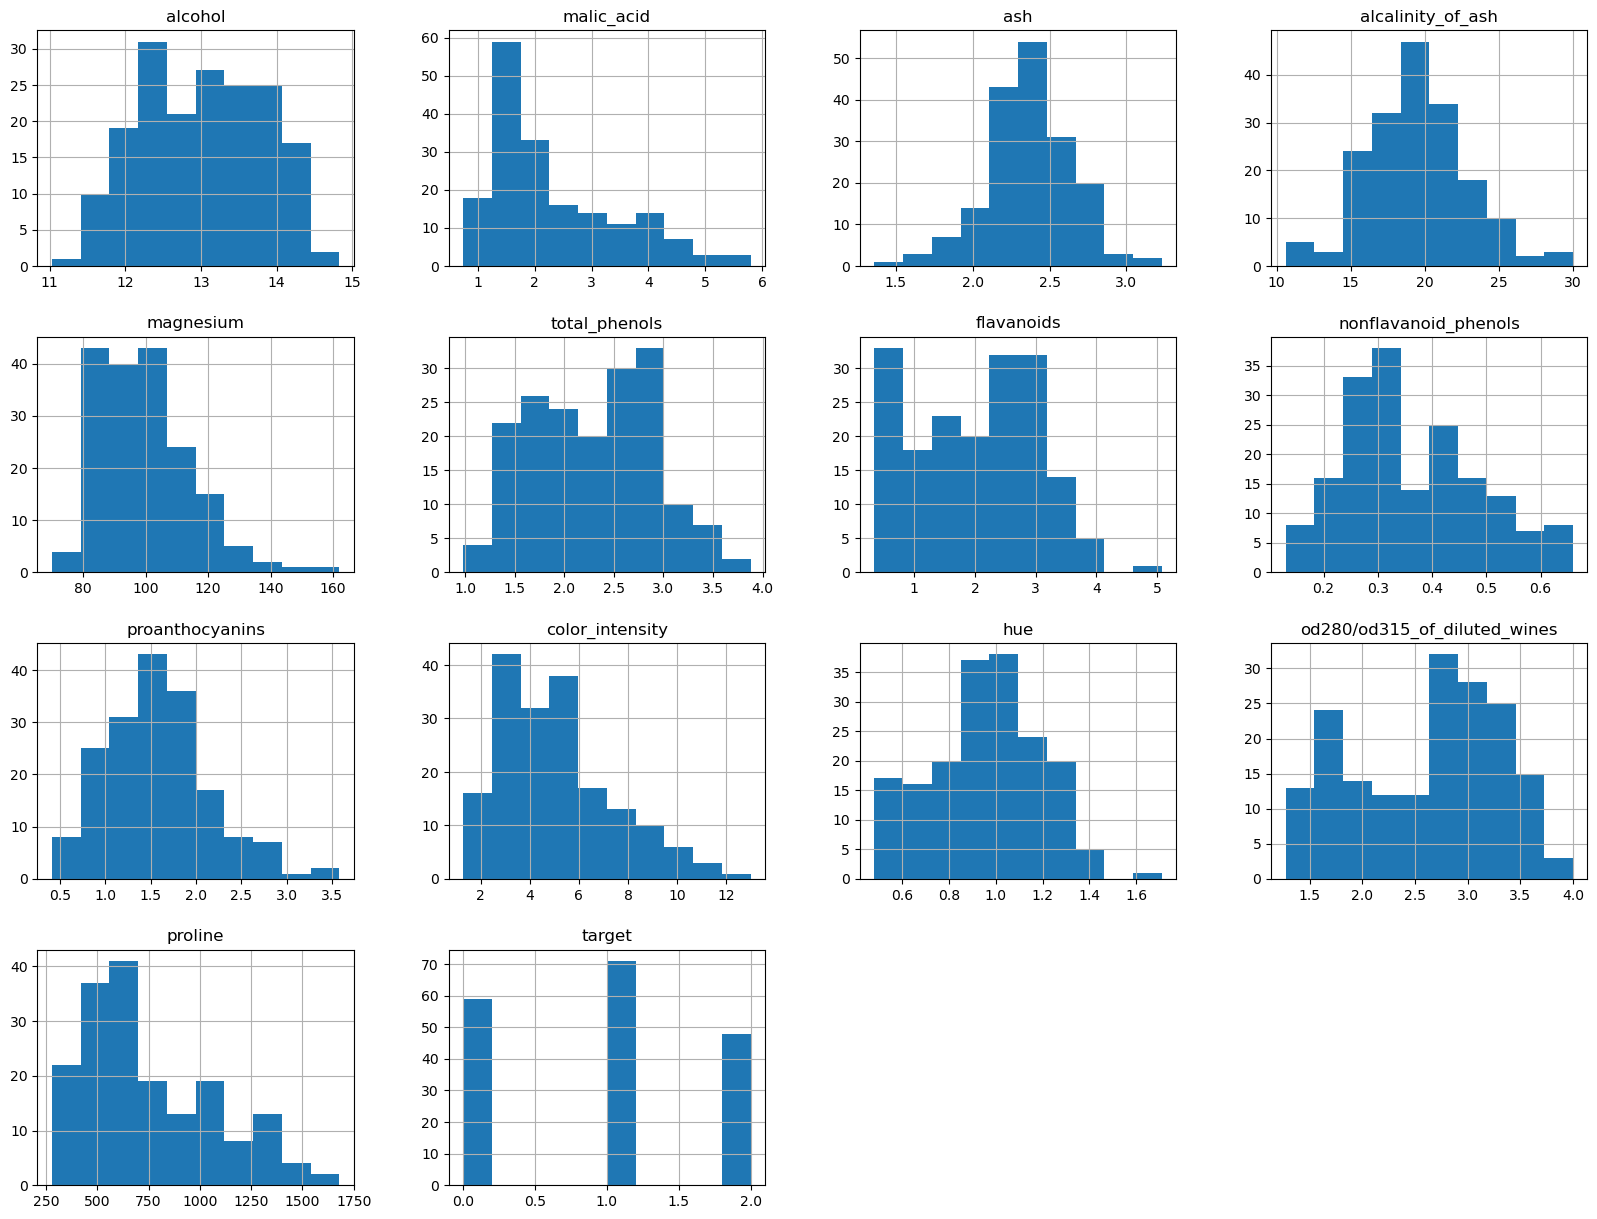

In [8]:
df.hist(bins=10, figsize=(20,15))
plt.show()

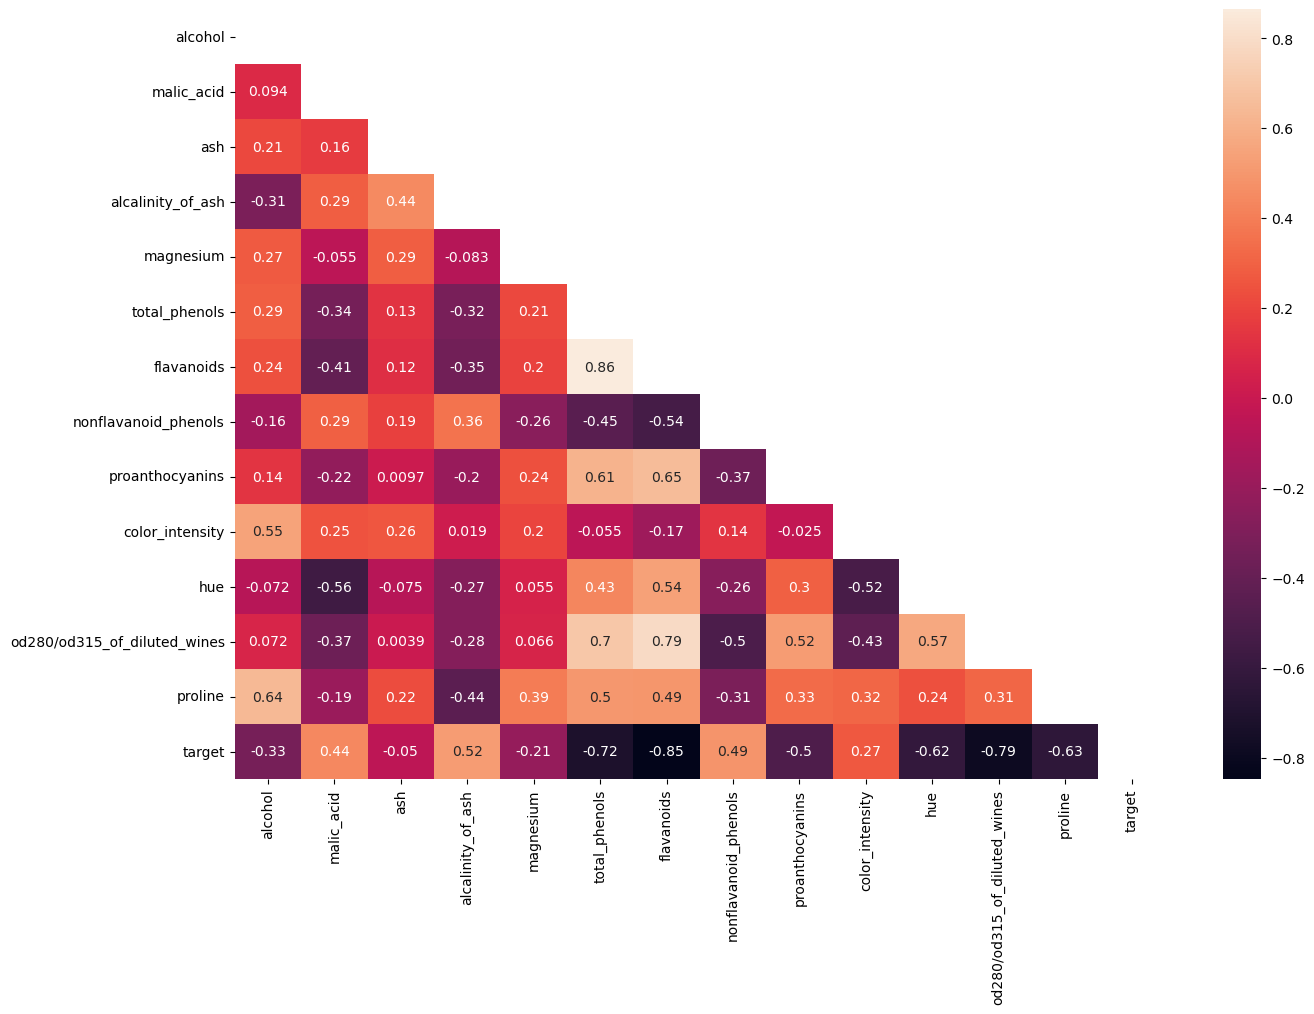

In [9]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, annot=True, mask=mask)
plt.show()

Classification model based on XGBoost

In [10]:
X = data.data
y = data.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [12]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [13]:
y_pred = xgb_model.predict(X_test) 
accuracy = accuracy_score(y_test,y_pred) 

print("Accuracy: %.2f%%" % (accuracy * 100.0))
cm = confusion_matrix(y_test, y_pred) 
print(cm)

Accuracy: 100.00%
[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 17]]


Model based on simple neural network

Using the same range for X_train, X_test, y_train, y_test

In [15]:
# data = load_wine()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [16]:
onehotencoder = OneHotEncoder()
y_train = onehotencoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = onehotencoder.transform(y_test.reshape(-1, 1)).toarray()

In [17]:
model = Sequential()
model.add(Dense(8, input_dim=13, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=10)

_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
15/15 [==============================] - 1s 2ms/step - loss: 165.4956 - accuracy: 0.2183
Epoch 2/150
15/15 [==============================] - 0s 3ms/step - loss: 128.1594 - accuracy: 0.2183
Epoch 3/150
15/15 [==============================] - 0s 3ms/step - loss: 92.2296 - accuracy: 0.2183
Epoch 4/150
15/15 [==============================] - 0s 3ms/step - loss: 56.0602 - accuracy: 0.2183
Epoch 5/150
15/15 [==============================] - 0s 3ms/step - loss: 32.6627 - accuracy: 0.2817
Epoch 6/150
15/15 [==============================] - 0s 2ms/step - loss: 27.8879 - accuracy: 0.3732
Epoch 7/150
15/15 [==============================] - 0s 2ms/step - loss: 23.5376 - accuracy: 0.3732
Epoch 8/150
15/15 [==============================] - 0s 1ms/step - loss: 19.9316 - accuracy: 0.4155
Epoch 9/150
15/15 [==============================] - 0s 2ms/step - loss: 16.8627 - accuracy: 0.4085
Epoch 10/150
15/15 [==============================] - 0s 2ms/step - loss: 13.5524 - accuracy: 0.45

In [18]:
history = model.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_test, y_test))
print(history.history.keys())


Epoch 1/150
15/15 [==============================] - 0s 9ms/step - loss: 0.5184 - accuracy: 0.7817 - val_loss: 0.4786 - val_accuracy: 0.8056
Epoch 2/150
15/15 [==============================] - 0s 5ms/step - loss: 0.5933 - accuracy: 0.8310 - val_loss: 0.5422 - val_accuracy: 0.6667
Epoch 3/150
15/15 [==============================] - 0s 4ms/step - loss: 0.5706 - accuracy: 0.7394 - val_loss: 0.4437 - val_accuracy: 0.8611
Epoch 4/150
15/15 [==============================] - 0s 4ms/step - loss: 0.5113 - accuracy: 0.8239 - val_loss: 0.4879 - val_accuracy: 0.7500
Epoch 5/150
15/15 [==============================] - 0s 4ms/step - loss: 0.5851 - accuracy: 0.7676 - val_loss: 0.4752 - val_accuracy: 0.8056
Epoch 6/150
15/15 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7606 - val_loss: 0.3897 - val_accuracy: 0.8889
Epoch 7/150
15/15 [==============================] - 0s 5ms/step - loss: 0.5831 - accuracy: 0.7324 - val_loss: 0.7221 - val_accuracy: 0.4722
Epoch 8/150
1

### Premiliminary results:

#### PL: Wyniki obu modeli wychodzą podobne. Jednak xgboost jest łatwiejszy i wygodniejszy w użyciu niż sieć neuonowa.

#### EN: The results of both models are similar. However, xgboost is easier and more convenient to use than neural network.